In [1]:
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
bin(5)

'0b101'

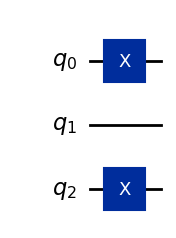

In [3]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw('mpl')

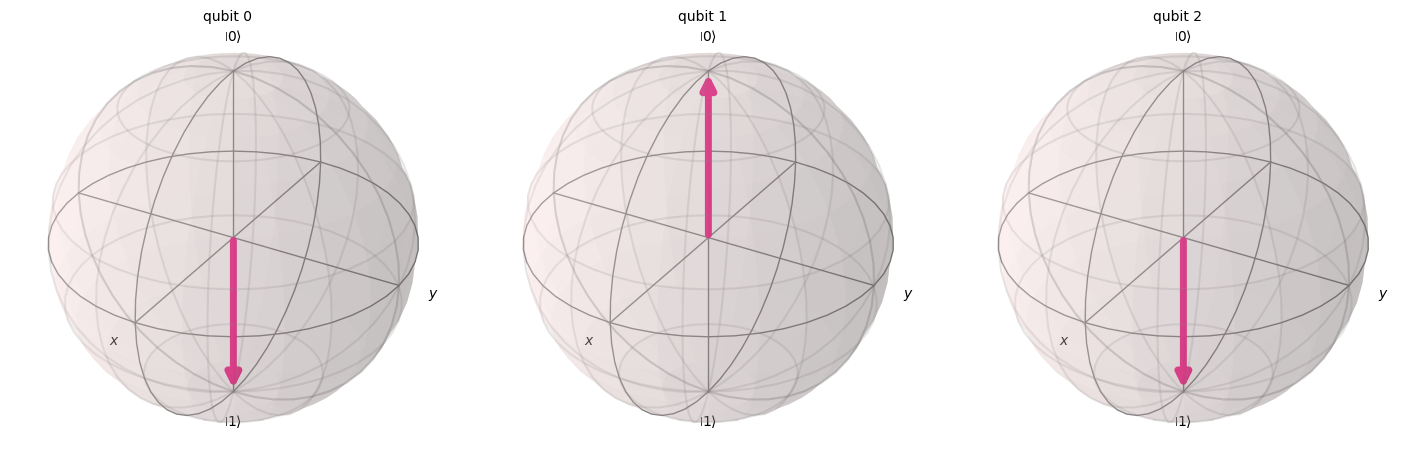

In [4]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

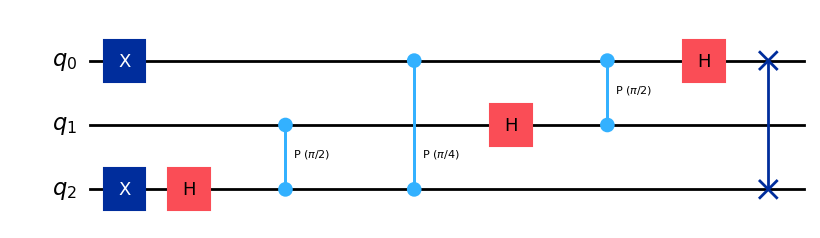

In [5]:
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

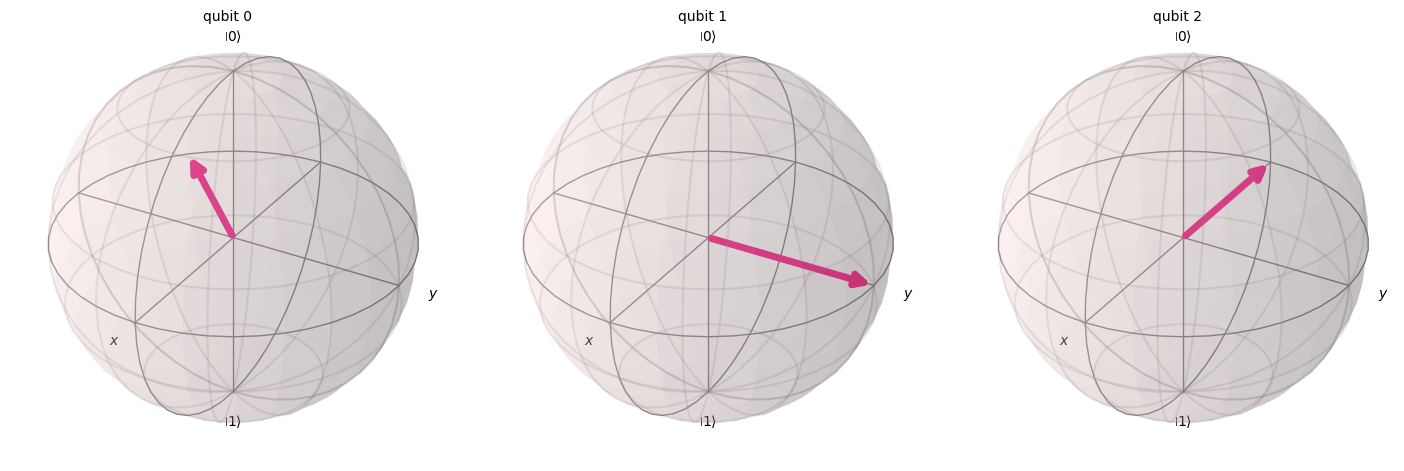

In [6]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [7]:
# Comment to picture above
# We can see out QFT function has worked correctly. Compared the state {zero in QFT basis}|0^~)=|+++>, 
# Qubit 0 has been rotated by  5/8 of a full turn, and
# qubit 1 has been rotated by 10/8 full turns (equivalent to 1/4 of a full turn), 
# qubit 2 has been rotated by 20/8 full turns (equivalent to 1/2 of a full turn).

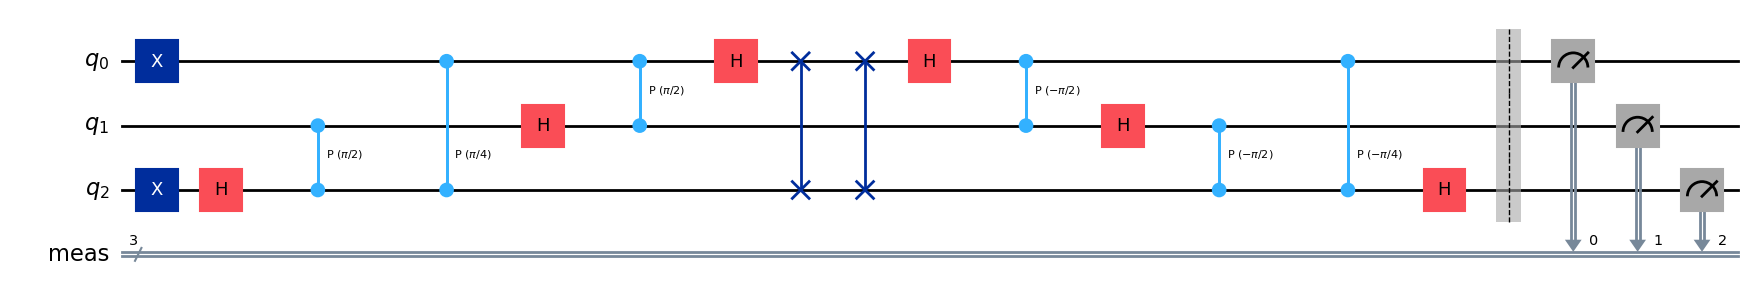

In [8]:
# normal QFT
qc=QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
# inverse QFT
qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(1)
qc.cp(-pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(-pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(2)
qc.measure_all()
qc.draw('mpl')

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)

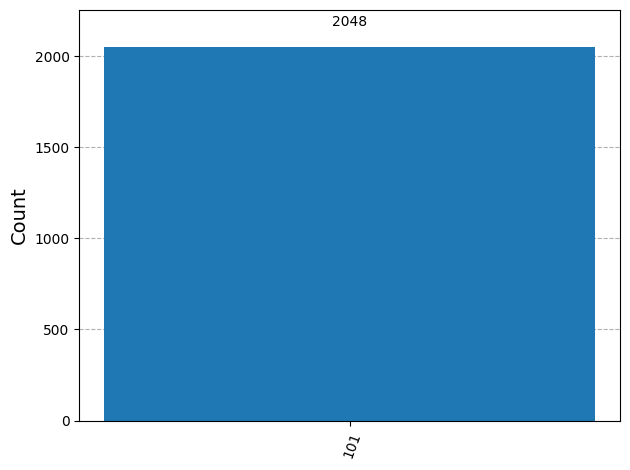

In [10]:
counts = job.result().get_counts()
plot_histogram(counts)

In [11]:
# create the bin 3 - make a QFT 
# first encode a number in the computational basis

In [12]:
bin(3)

'0b11'

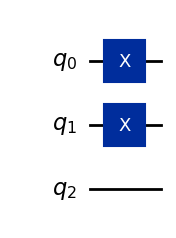

In [13]:
# The number 3 in binary is 110. Let's encode this into our qubits:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(1)
qc.draw('mpl')

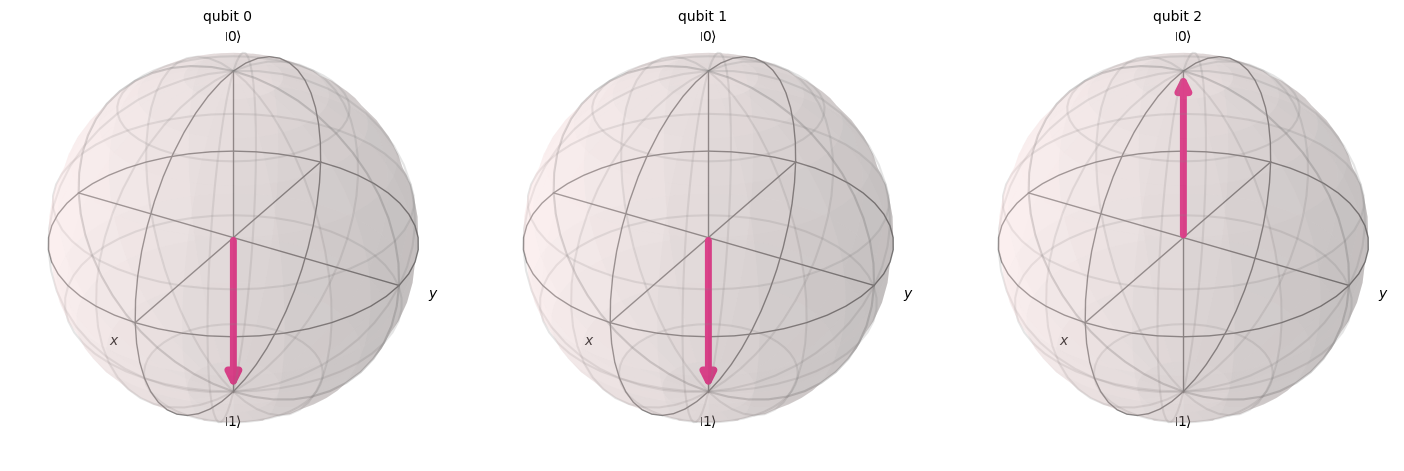

In [14]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

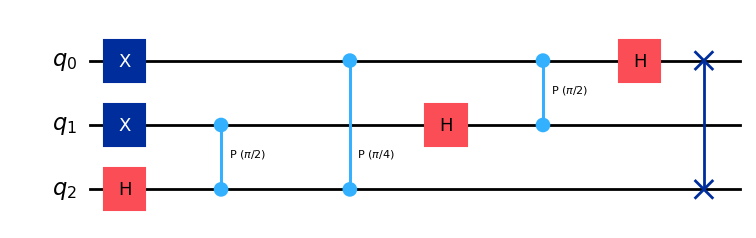

In [15]:
# create QFT circuit 
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

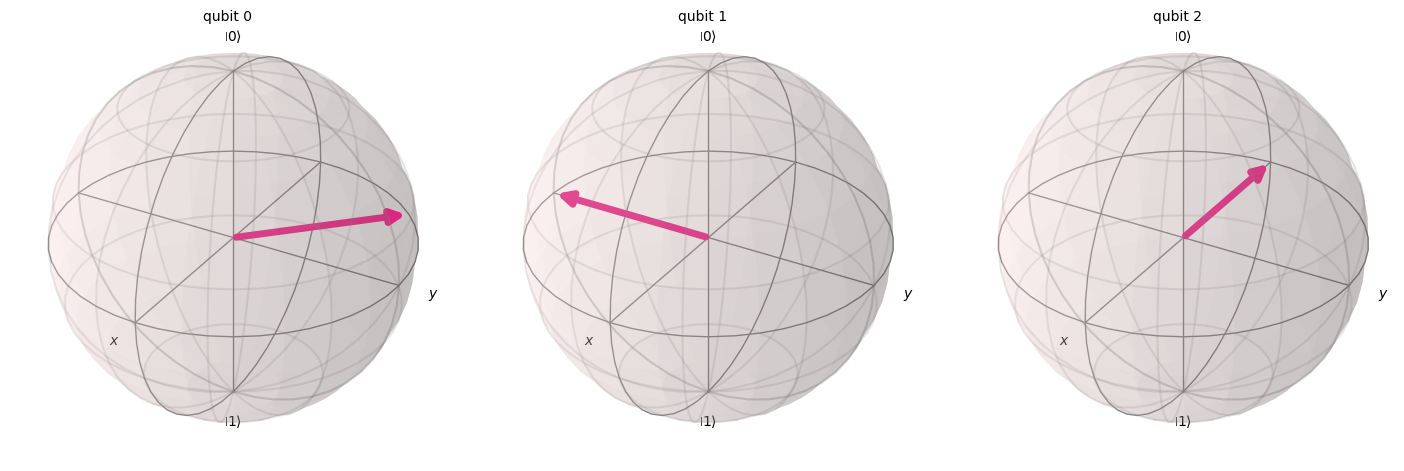

In [16]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

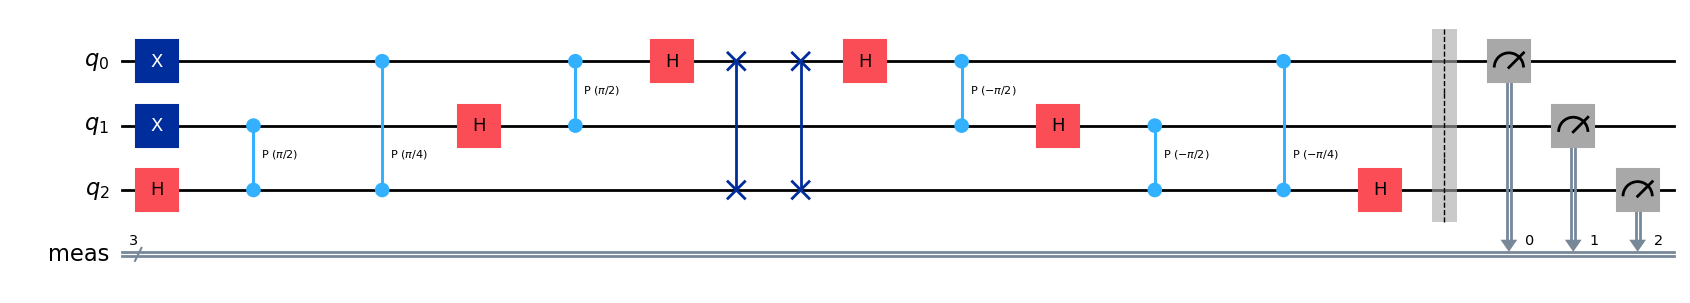

In [17]:
# create QFT circuit 
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
# inverse QFT
qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(1)
qc.cp(-pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(-pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(2)
qc.measure_all()
qc.draw('mpl')

In [18]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
#job_monitor(job)

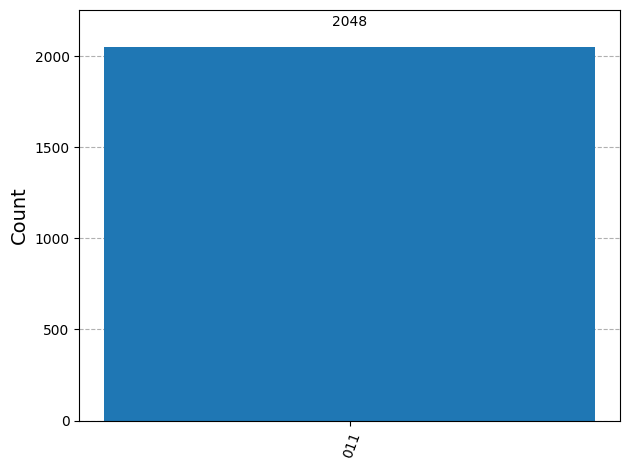

In [19]:
counts = job.result().get_counts()
plot_histogram(counts)

## 151936 Tasks for Laboratory 5

In [29]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np
from numpy import pi

In [57]:
def get_qft_statevector3(binary_string):
    n = len(binary_string)
    qc = QuantumCircuit(n)
    
    for i, bit in enumerate(reversed(binary_string)):
        if bit == '1':
            qc.x(i)

    qc.barrier()

    qc.h(2)
    qc.cp(pi/2, 1, 2)
    qc.cp(pi/4, 0, 2)
    qc.h(1)
    qc.cp(pi/2, 0, 1)
    qc.h(0)
    qc.swap(0, 2)
    
    sim = Aer.get_backend("aer_simulator")
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    return statevector

def recursive_qft(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi / 2**(n - qubit), qubit, n)
    
    recursive_qft(circuit, n)

def build_qft_circuit(n_qubits):
    qc = QuantumCircuit(n_qubits)
    recursive_qft(qc, n_qubits)
    for i in range(n_qubits // 2):
        qc.swap(i, n_qubits - i - 1)
    return qc

Task 1: Fourier state of |100>


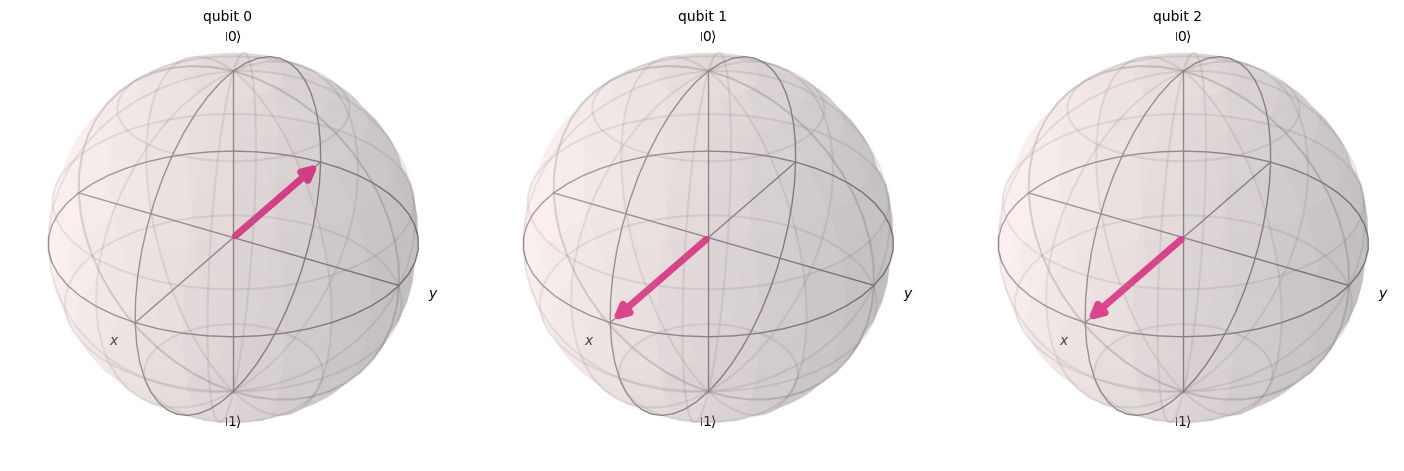

In [58]:
print("Task 1: Fourier state of |100>")
display(plot_bloch_multivector(get_qft_statevector3("100")))

Task 2: Fourier state of |011>


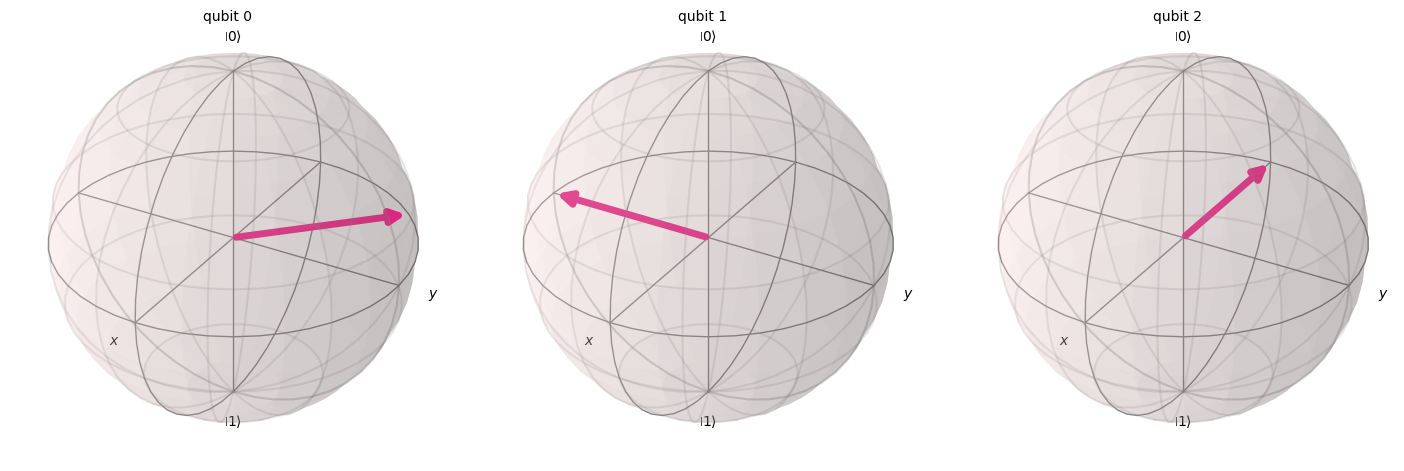

In [59]:
print("Task 2: Fourier state of |011>")
display(plot_bloch_multivector(get_qft_statevector3("011")))

Task 3: Fourier transform of states |000> through |111>
State |000> in Fourier Basis:


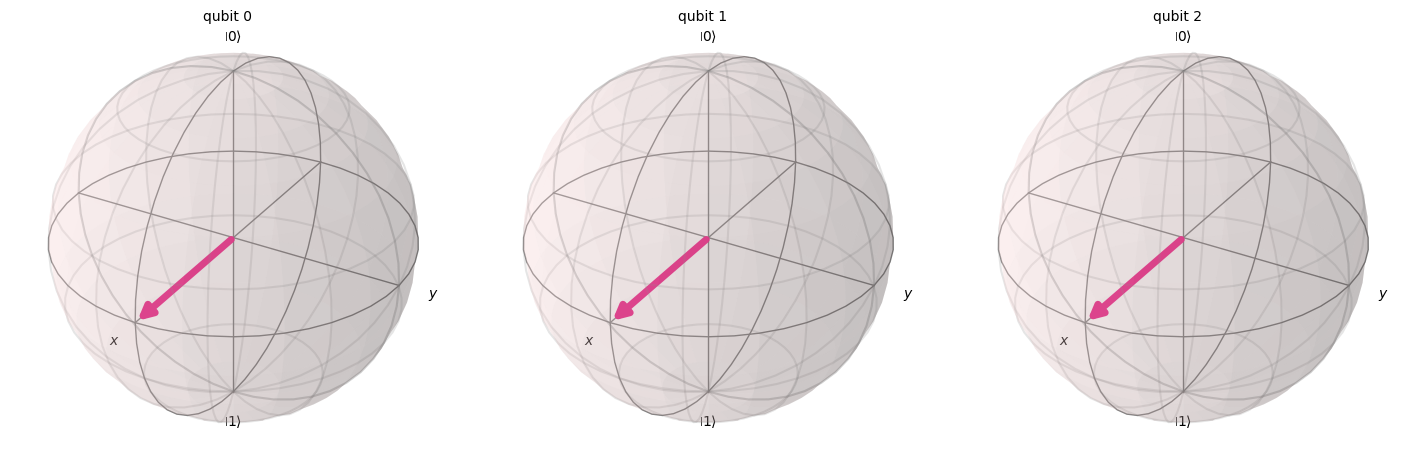

State |001> in Fourier Basis:


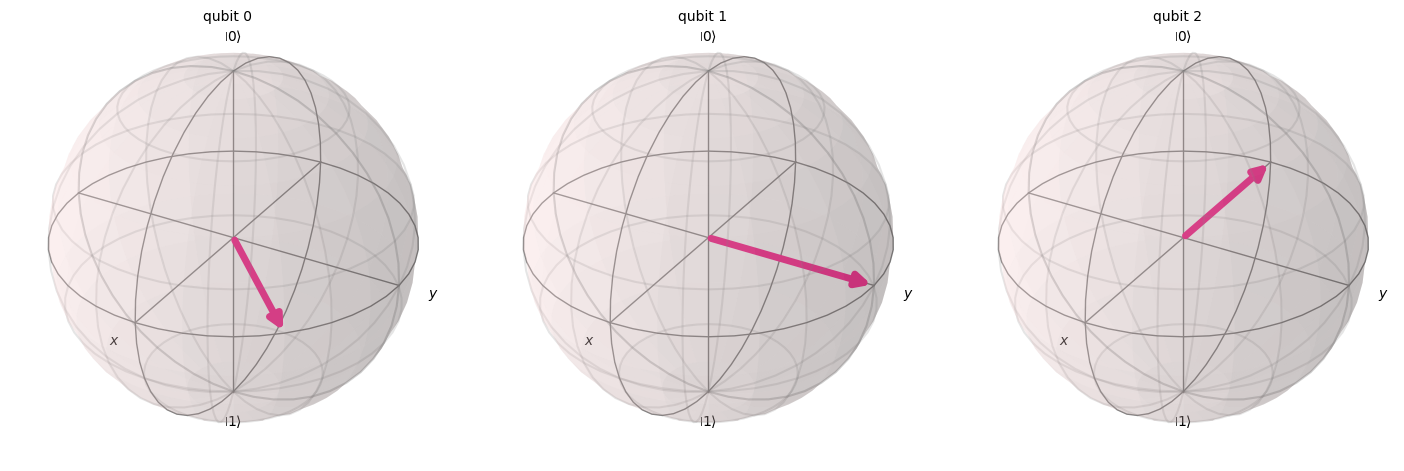

State |010> in Fourier Basis:


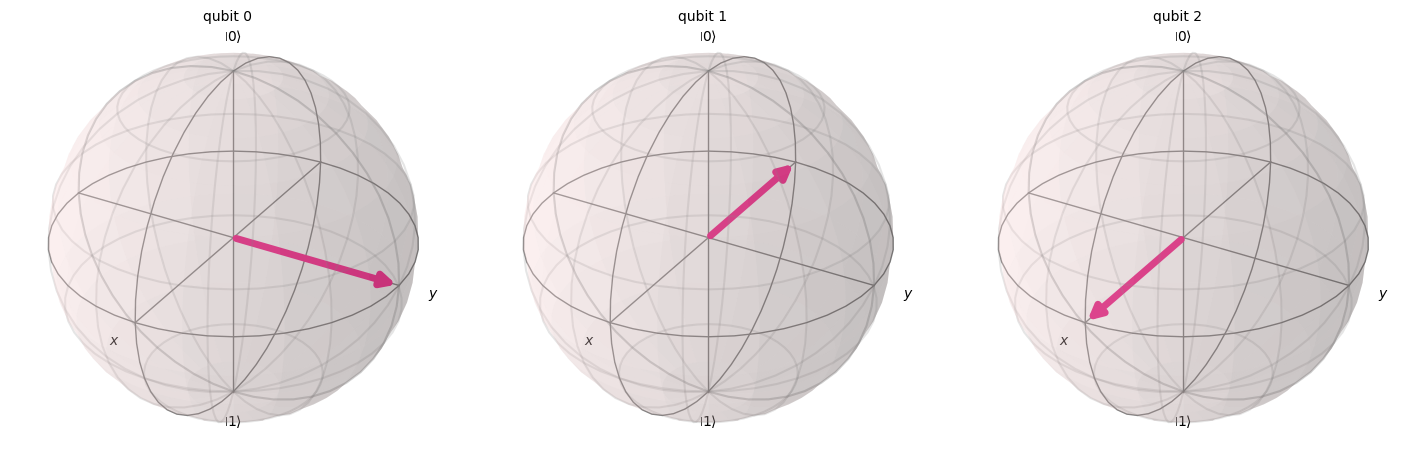

State |011> in Fourier Basis:


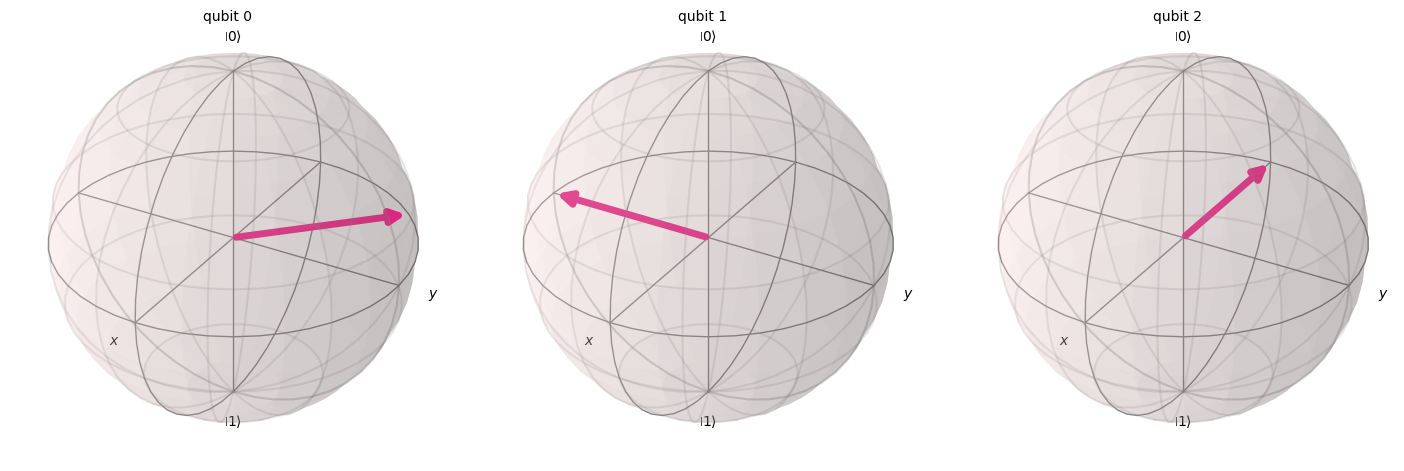

State |100> in Fourier Basis:


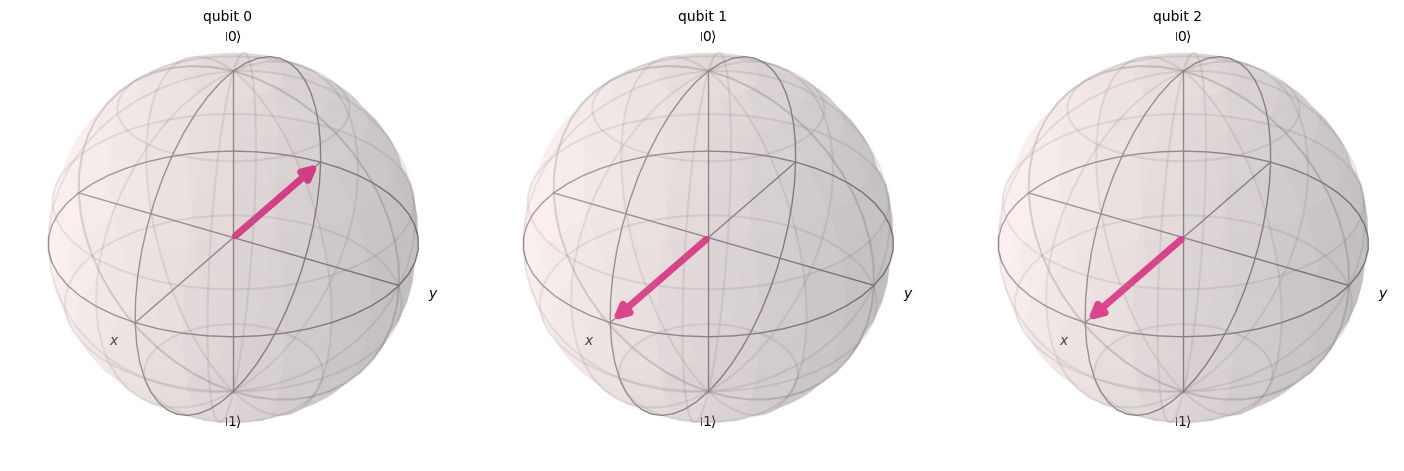

State |101> in Fourier Basis:


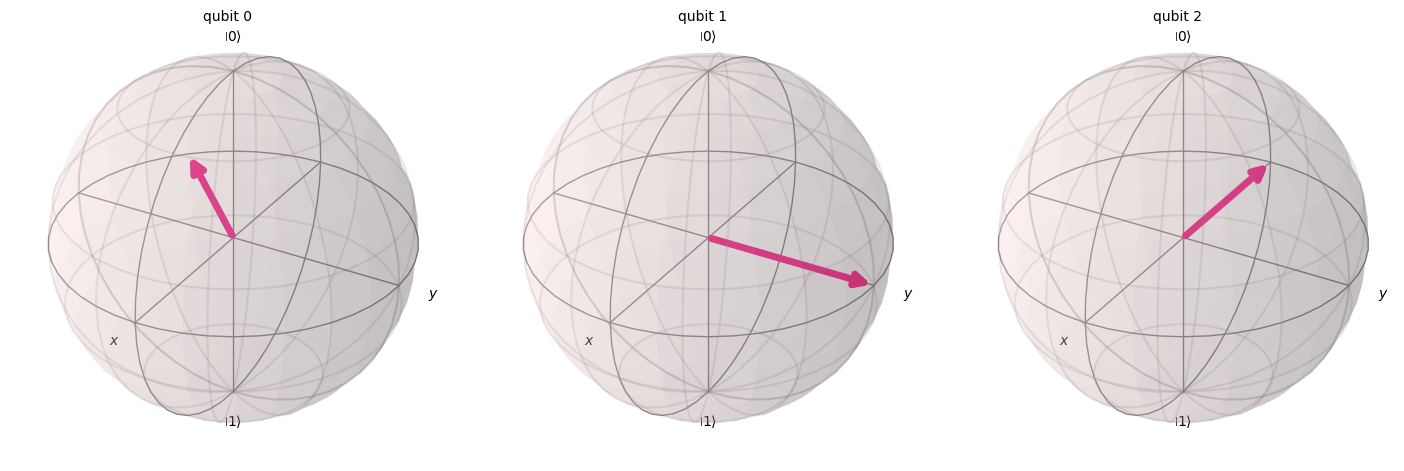

State |110> in Fourier Basis:


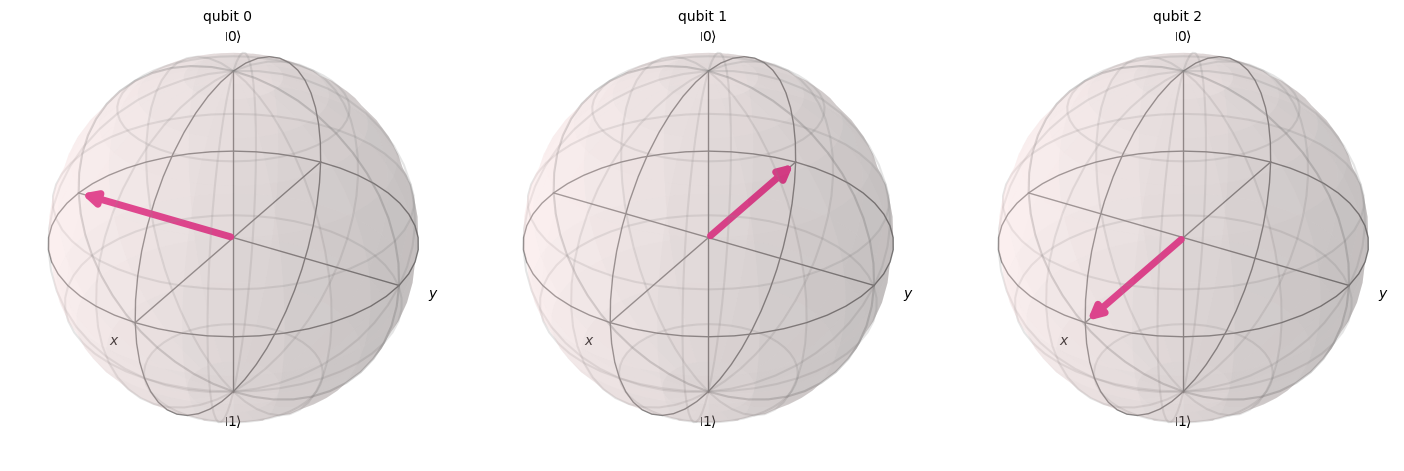

State |111> in Fourier Basis:


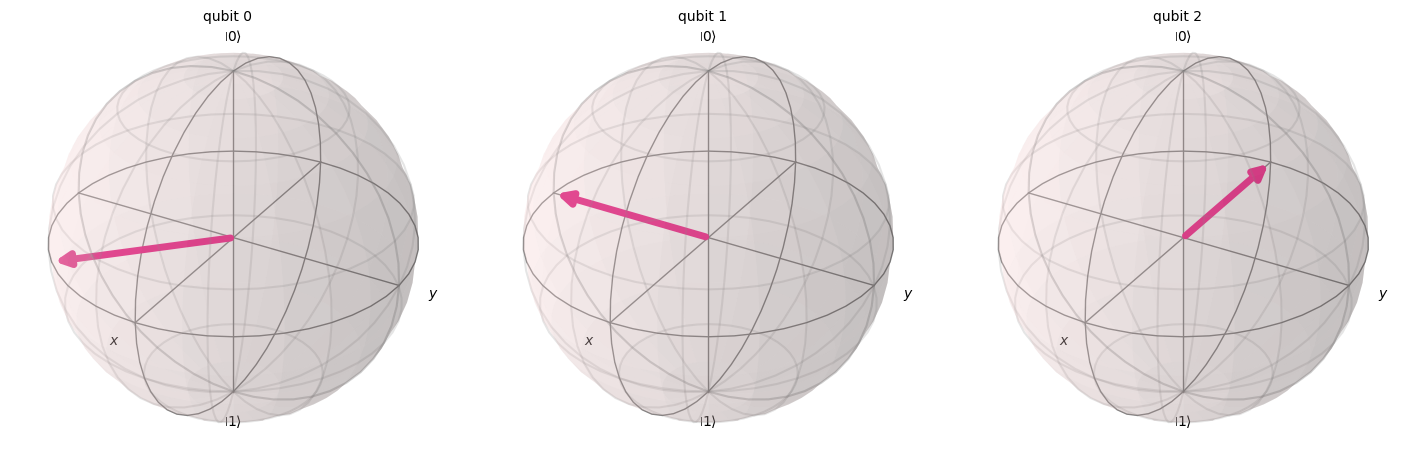

In [60]:
print("Task 3: Fourier transform of states |000> through |111>")
for i in range(8):
    binary = format(i, '03b')
    print(f"State |{binary}> in Fourier Basis:")
    display(plot_bloch_multivector(get_qft_statevector3(binary)))

n=1 qubits: QFT Unitary matrix generated successfully (Shape: (2, 2))


C:\Users\tymon\AppData\Local\Temp\ipykernel_876\1028657352.py:10: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(f"n={n} qubits: QFT Unitary matrix generated successfully (Shape: {unitary.shape})")


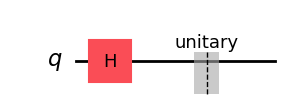

n=2 qubits: QFT Unitary matrix generated successfully (Shape: (4, 4))


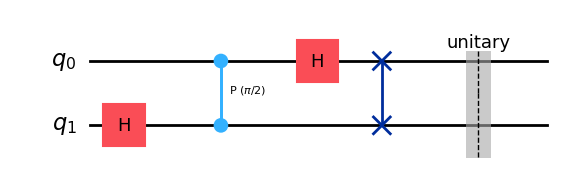

n=3 qubits: QFT Unitary matrix generated successfully (Shape: (8, 8))


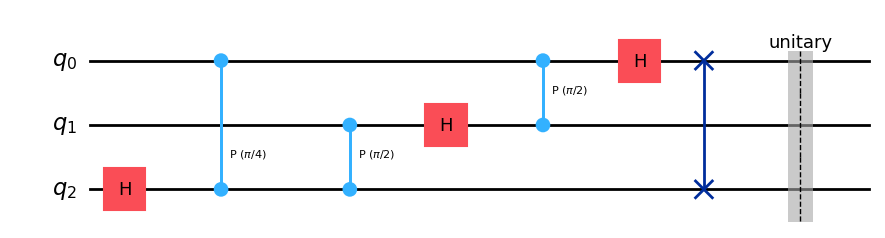

n=4 qubits: QFT Unitary matrix generated successfully (Shape: (16, 16))


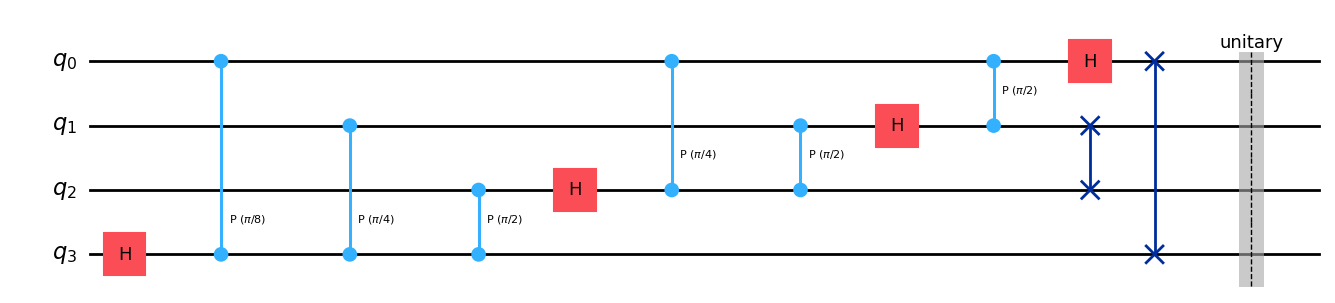

n=5 qubits: QFT Unitary matrix generated successfully (Shape: (32, 32))


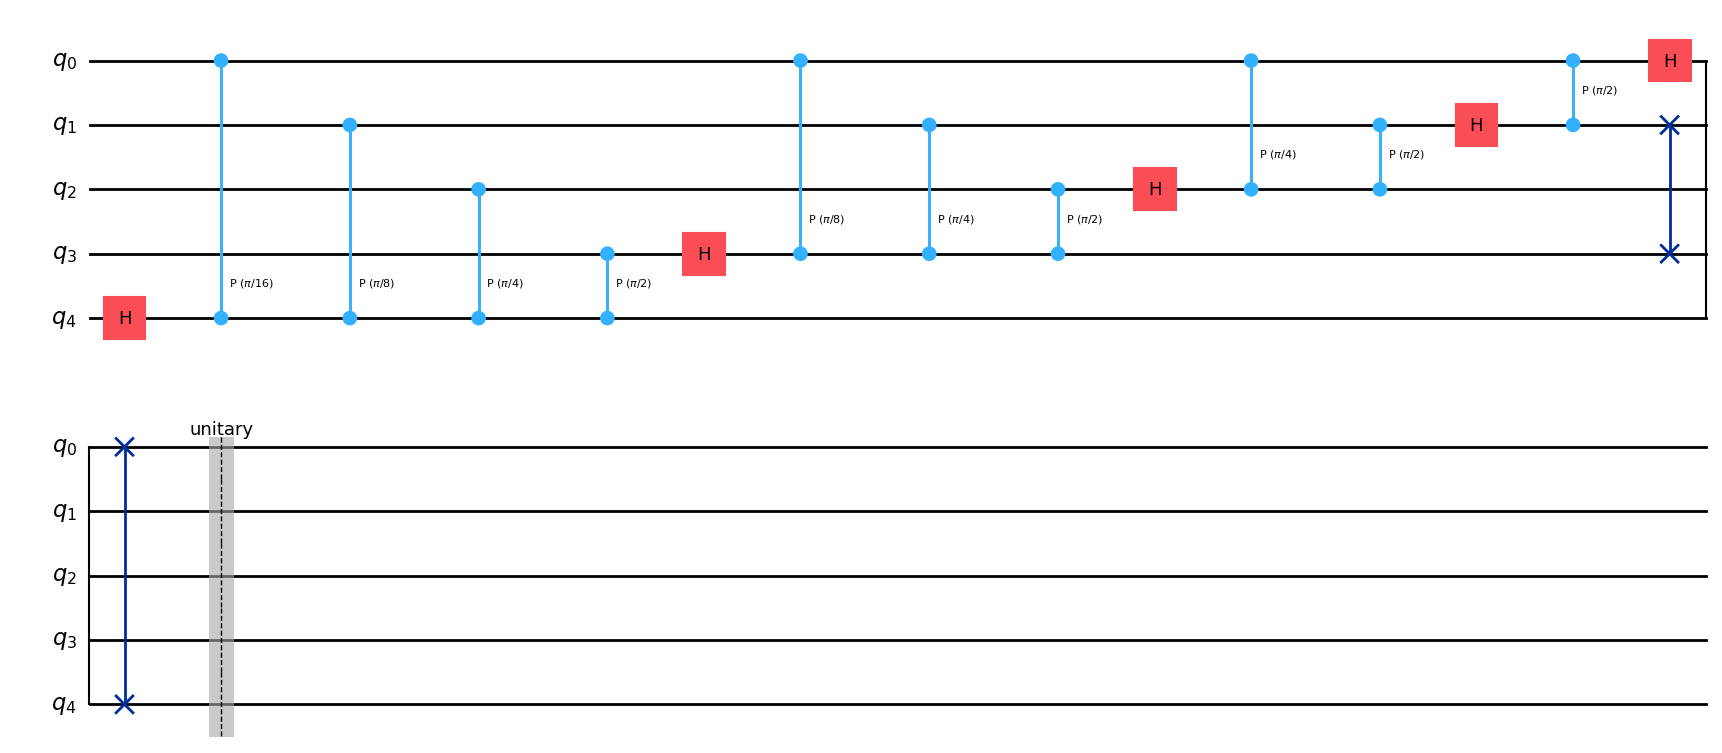

n=6 qubits: QFT Unitary matrix generated successfully (Shape: (64, 64))


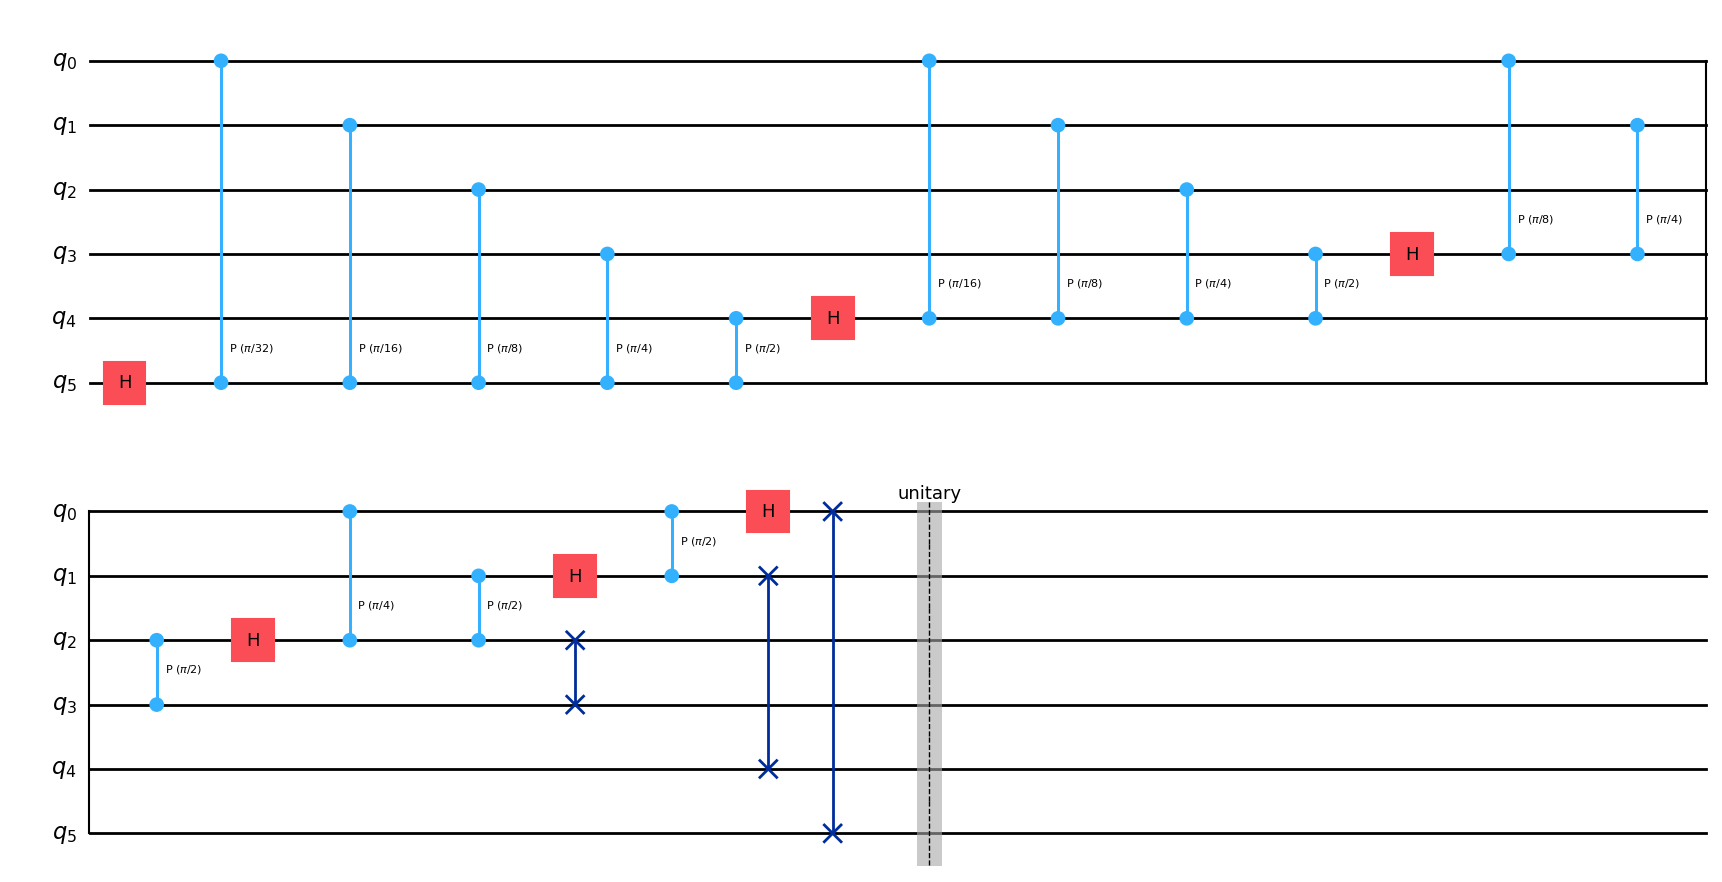

n=7 qubits: QFT Unitary matrix generated successfully (Shape: (128, 128))


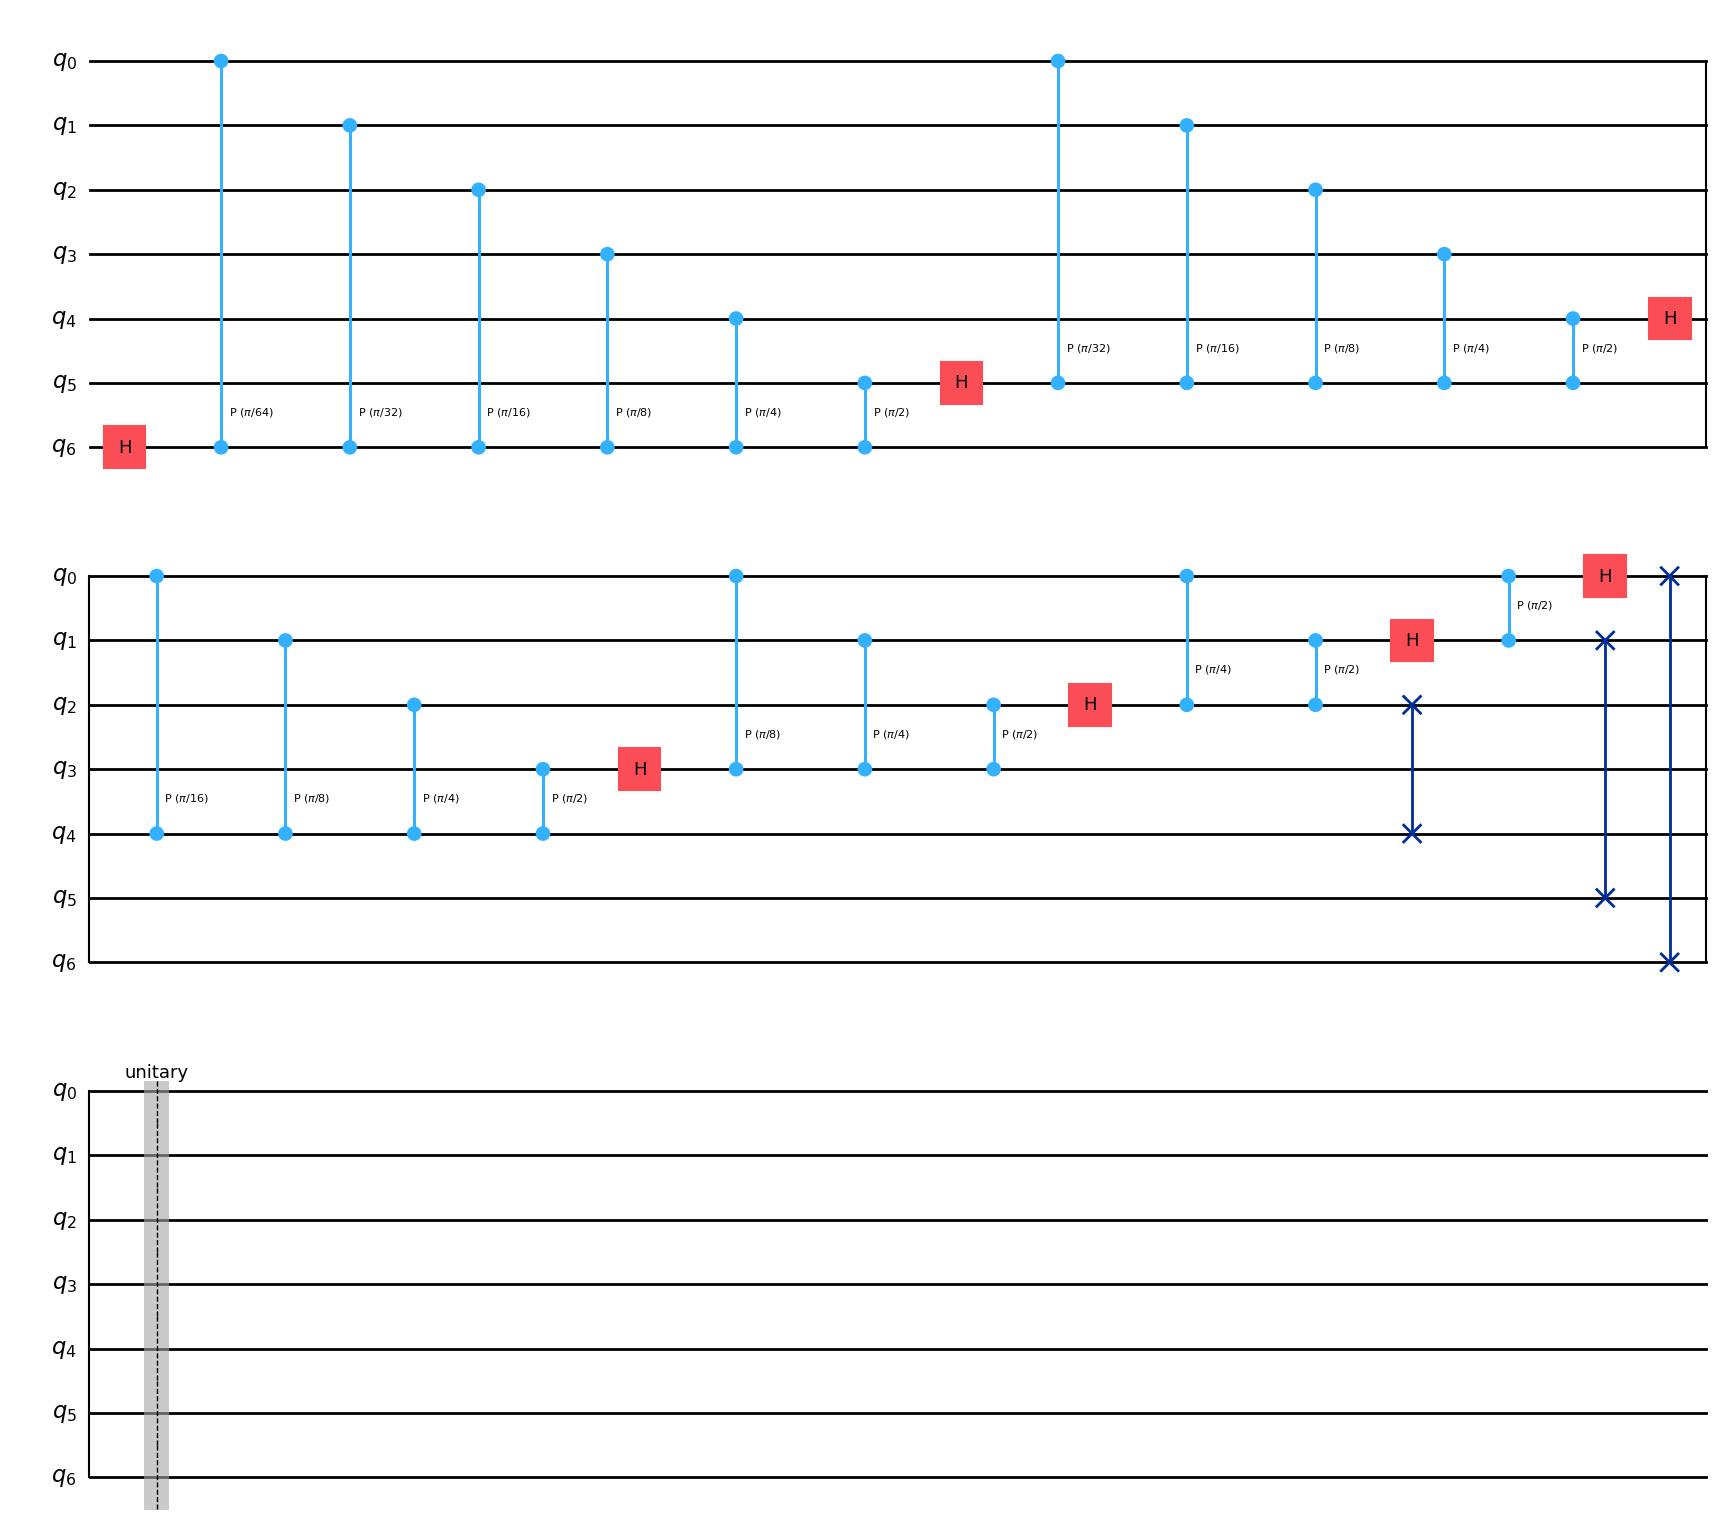

n=8 qubits: QFT Unitary matrix generated successfully (Shape: (256, 256))


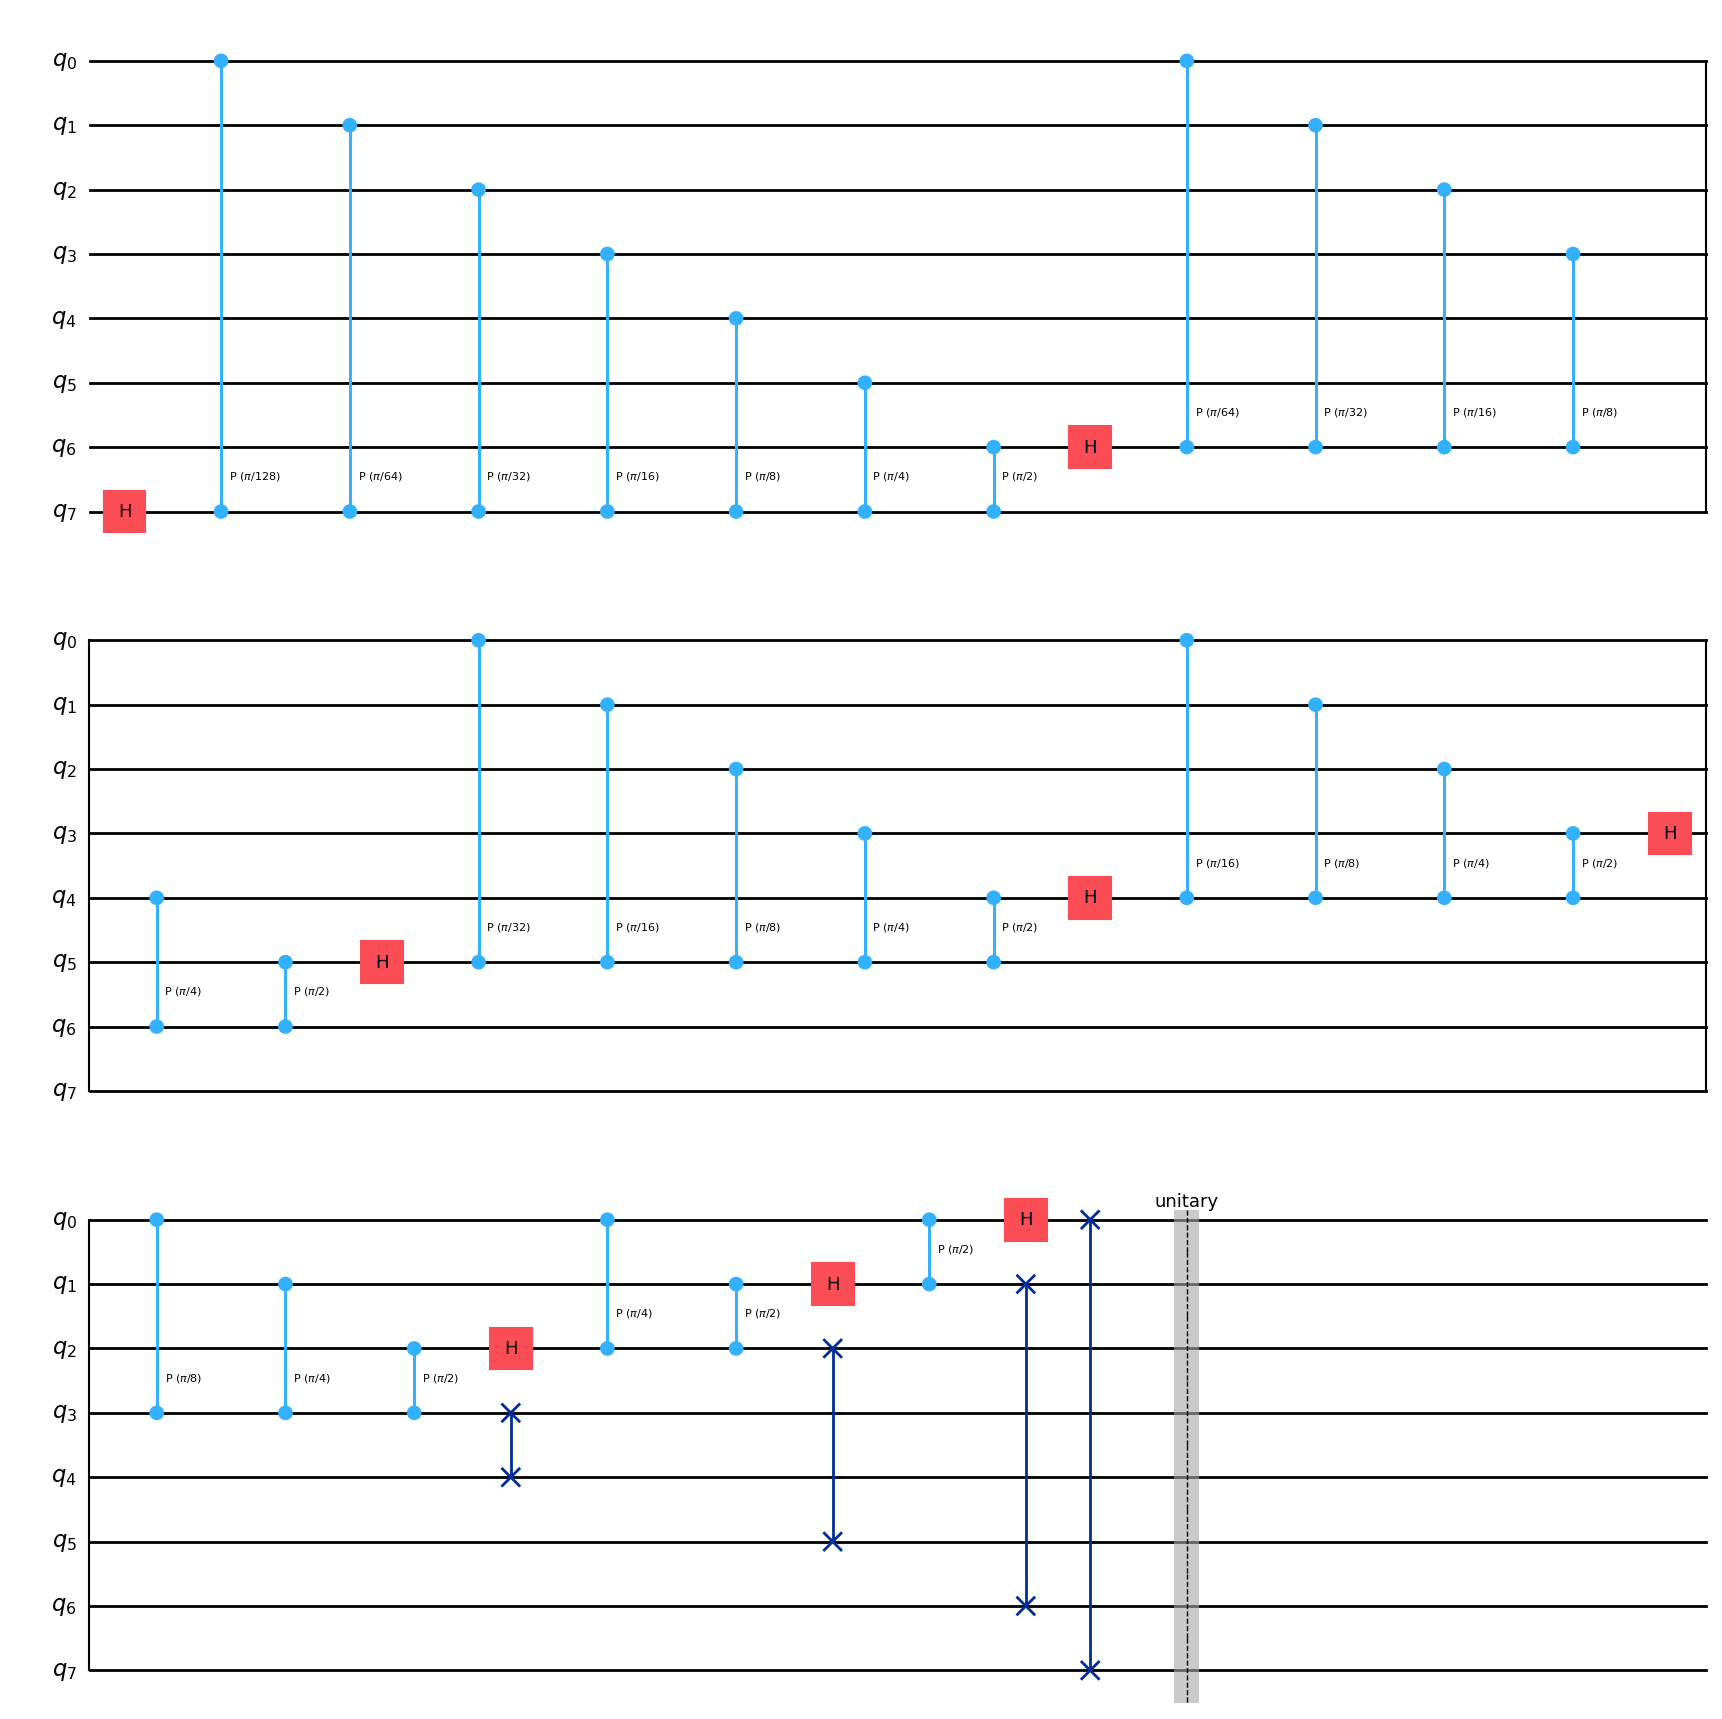

In [64]:
sim = Aer.get_backend('aer_simulator')

for n in range(1, 9):
    test_qc = build_qft_circuit(n)
    test_qc.save_unitary()
    
    t_qc = transpile(test_qc, sim)
    unitary = sim.run(t_qc).result().get_unitary()
    
    print(f"n={n} qubits: QFT Unitary matrix generated successfully (Shape: {unitary.shape})")
    display(test_qc.draw('mpl'))
